# Hand Digit Recognition

In [1]:
from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install pydot

In [3]:
# Loading the MNIST dataset
(x_train,y_train),(x_test,y_test) = load_data()

# Reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],
                         x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],
                        x_test.shape[2],1))

In [4]:
# Normalizing the valus of pixels of images
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255

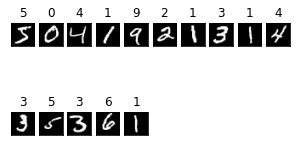

In [5]:
fig = plt.figure(figsize = (5,3))
for i in range(15):
    ax = fig.add_subplot(2,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])

In [6]:
# Determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)


(28, 28, 1)


In [7]:
# Defining the model
model = Sequential()
model.add(Conv2D(32,(3,3),activation ="relu",input_shape = img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation = "relu"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

In [9]:
model.compile(optimizer="adam",loss = 'sparse_categorical_crossentropy',
                         metrics = ["accuracy"])
x = model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 16s - loss: 0.2372 - accuracy: 0.9282 - val_loss: 0.0583 - val_accuracy: 0.9833
Epoch 2/10
422/422 - 17s - loss: 0.0805 - accuracy: 0.9751 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 3/10
422/422 - 20s - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 4/10
422/422 - 20s - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0316 - val_accuracy: 0.9907
Epoch 5/10
422/422 - 21s - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0275 - val_accuracy: 0.9923
Epoch 6/10
422/422 - 23s - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 7/10
422/422 - 23s - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0285 - val_accuracy: 0.9922
Epoch 8/10
422/422 - 22s - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0262 - val_accuracy: 0.9928
Epoch 9/10
422/422 - 21s - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0235 - val_accuracy: 0.9922
Epoch 10/10
422/422 - 21s - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.0236 - val_accura

In [16]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print(f"Accuracy: {accuracy*100}")

Accuracy: 99.30999875068665


In [17]:
from IPython.display import Image

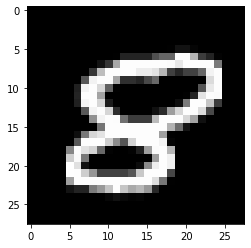

In [45]:
image = x_train[9769]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image),cmap = 'gray')
plt.show()

In [46]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 8
